### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BikeIndia has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

In such an attempt, BikeIndia aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


#  Reading and Understanding the Data

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing days.csv 
df=pd.read_csv("day.csv")

In [4]:
# view some sample records
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# check shape
df.shape

(730, 16)

In [6]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# check describe
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Data Preparation

In [9]:
# drop colums which are not nessary for
df.drop(['instant','dteday','casual','registered','atemp'], inplace=True,axis=1)

In [10]:
#check for remaining col
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [11]:
# mapping columns
df['season']=df['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [12]:
df['mnth']=df['mnth'].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [13]:
df['weekday']=df['weekday'].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [14]:
df['weathersit']=df['weathersit'].map({1:'clear',2:'misty',3:'light_snowrain',4:'heavy_snowrain'})

In [15]:
#check for changes in col
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,jan,0,mon,1,misty,14.110847,80.5833,10.749882,985
1,spring,0,jan,0,tue,1,misty,14.902598,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,1600


temp


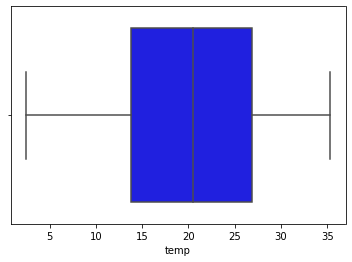

hum


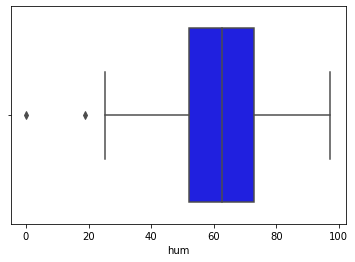

windspeed


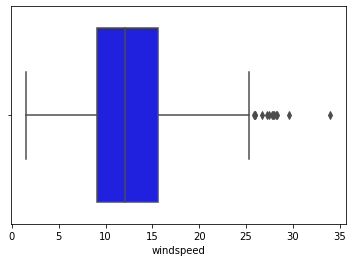

cnt


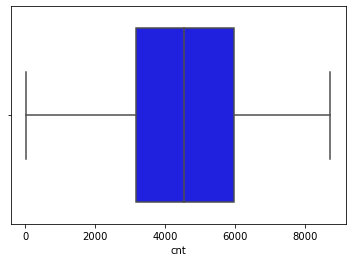

In [16]:
# checking outliers in the numerical col
num_vars=['temp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(6,4))
for i in num_vars:
    print(i)
    sns.boxplot(df[i], color='b')
    plt.show()

In [17]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [18]:
##check  replace with median() function in windspeed
df["windspeed"]=df["windspeed"].fillna(df["windspeed"].median()) 

In [19]:
#check null values
round(100*df.isnull().mean(),2)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

# Visualising the Data


### Univariate analysis

In [20]:
# function to create barplot related to categorical columns

def plot_cat_columns(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(column,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=df, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

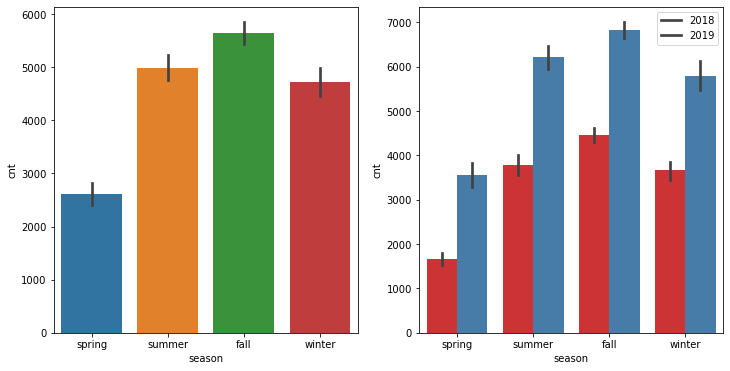

In [21]:
# plotting visualization for season column

plot_cat_columns('season')

*Fall season  have high  booking.
*other each season the booking count has increased drastically from 2018 to 2019.

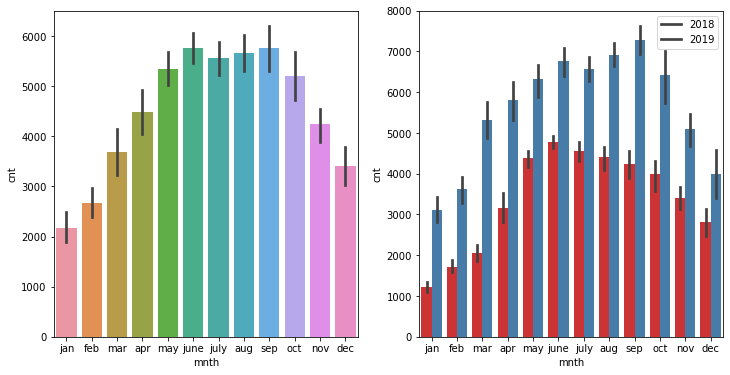

In [22]:
# plotting visualization for month column

plot_cat_columns('mnth')

Most of the bookings has been done during the month of may, june, july, aug, sep and oct. Pattern expanded beginning of the year till mid of the year and afterward it began diminishing as we moved toward the finish of year. Number of reserving for every month appears to have expanded from 2018 to 2019.

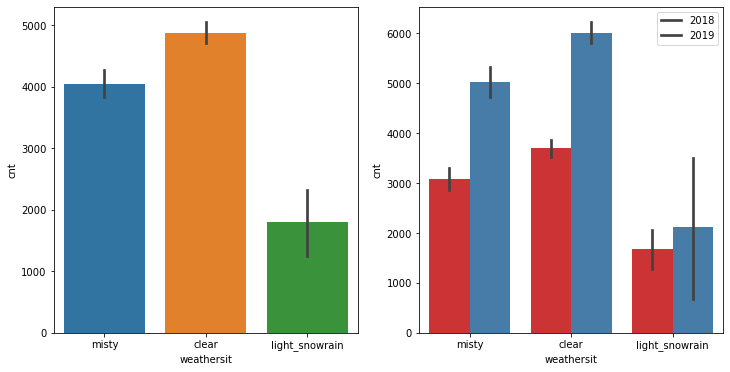

In [23]:
# plotting visualization for weathersit column

plot_cat_columns('weathersit')

Clear weather have high booking which we can oberve it. And in comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.

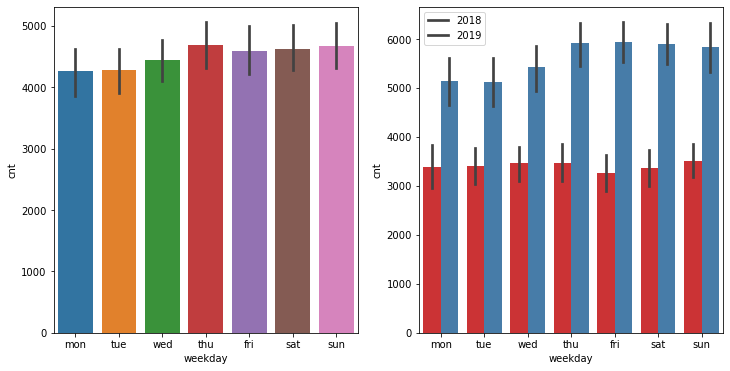

In [24]:
# plotting visualization for weekday column

plot_cat_columns('weekday')

Thu, Fir, Sat and Sun have more number of bookings as compared to the start of the week.

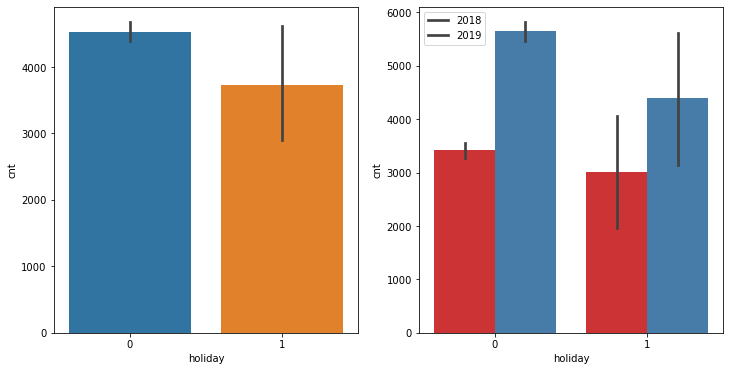

In [25]:
# plotting visualization for holiday column

plot_cat_columns('holiday')

When its not holiday, booking seems to be less in number which seems reasonable as on holidays, people may want to spend time at home and enjoy with family.

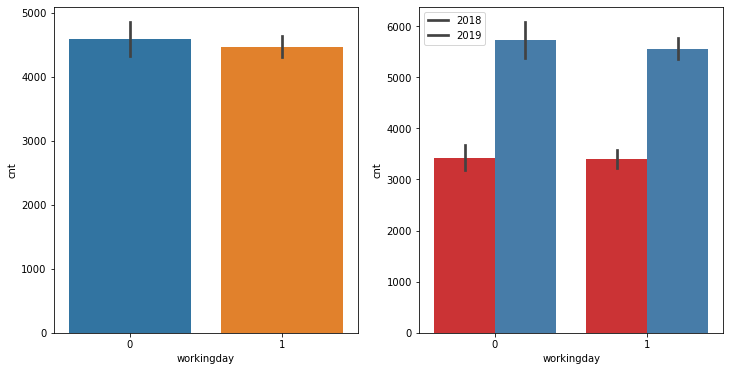

In [26]:
# plotting visualization for workingday column

plot_cat_columns('workingday')

Booking seemed to be almost equal either on working day or non-working day. But, the count increased from 2018 to 2019.

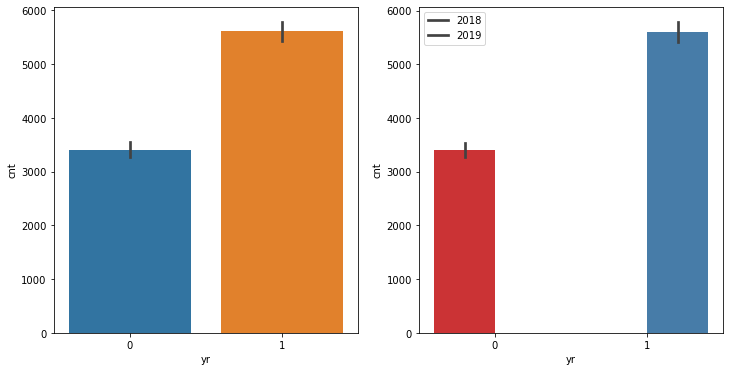

In [27]:
# plotting visualization for year column

plot_cat_columns('yr')

2019 attracted more number of booking from the previous year, which shows good progress in terms of business.

### Bivariate Analysis:

In [28]:
num_vars=['temp', 'hum', 'windspeed', 'cnt']

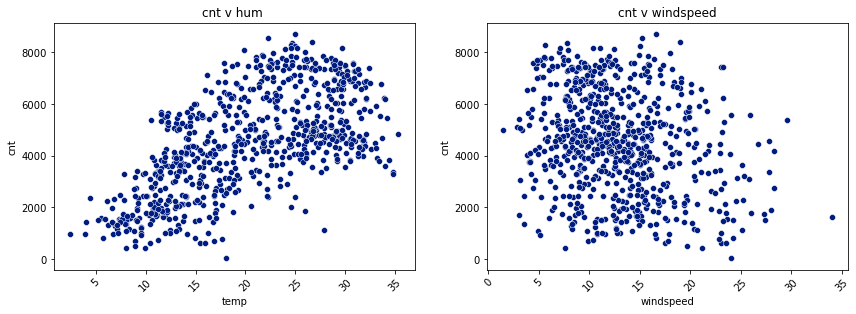

In [29]:
plt.figure(figsize=(22, 10))
plt.style.use("seaborn-dark-palette")
plt.subplot(2, 3, 1)
sns.scatterplot(df.temp,df.cnt)
plt.xlabel('temp')
plt.ylabel('cnt')
plt.title('cnt v hum ')
plt.xticks(rotation = 45)

plt.subplot(2, 3, 2)
sns.scatterplot(df.windspeed,df.cnt)
plt.xlabel('windspeed')
plt.ylabel('cnt')
plt.title('cnt v windspeed')
plt.xticks(rotation = 45)
plt.show()



As we looks the above figure 'temp' is most correlated with cnt

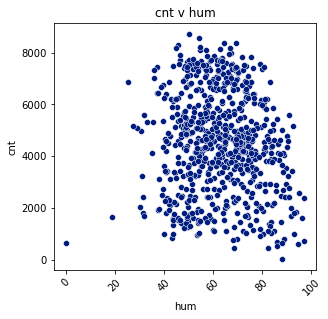

In [30]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 3, 3)
sns.scatterplot(df.hum,df.cnt)
plt.xlabel('hum')
plt.ylabel('cnt')
plt.title('cnt v hum')
plt.xticks(rotation = 45)
plt.show()

In [31]:
#check for the categorical variable for visualization
cat_vars=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

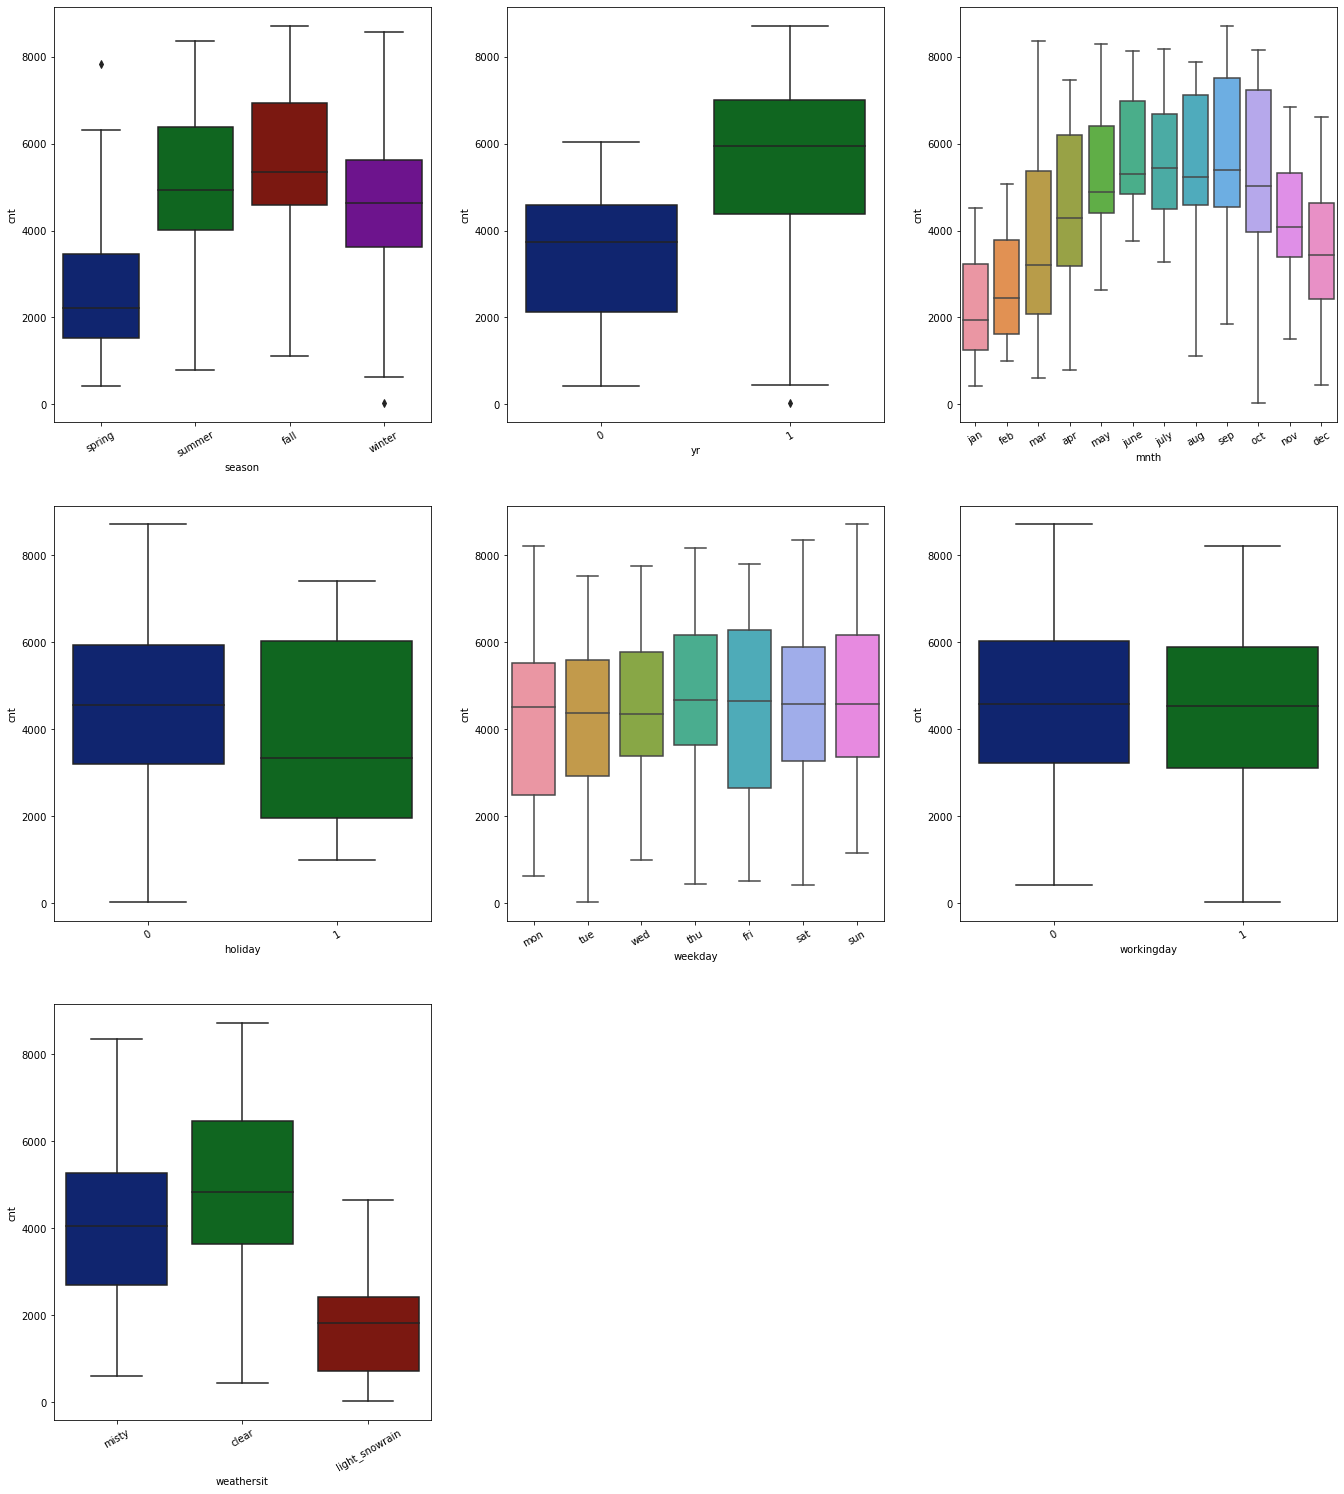

In [32]:
#using loop
#set target value cnt plot the boxplot
plt.figure(figsize=(23,26))
for i in (enumerate(cat_vars)):
    plt.subplot(len(cat_vars)//2,3,i[0]+1)
    sns.boxplot(x=i[1],y='cnt',data=df)
  
    plt.xticks(rotation=30)
plt.show()

-As per above graph we can say:

            -summer and fall have high meadian
            - year 1:2019 have high meadian
            - month sep have high meadian
            - 1: Clear, Few clouds, Partly cloudy, Partly cloudy  high meadian
            - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  high meadian
            - All days have alsont equal median
            - working and non morking day have same meadian
            - holidays have high meadian

In [33]:
#check for the number variable for visualization and outliers
num_vars=['temp', 'hum', 'windspeed', 'cnt']

Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to cnt.

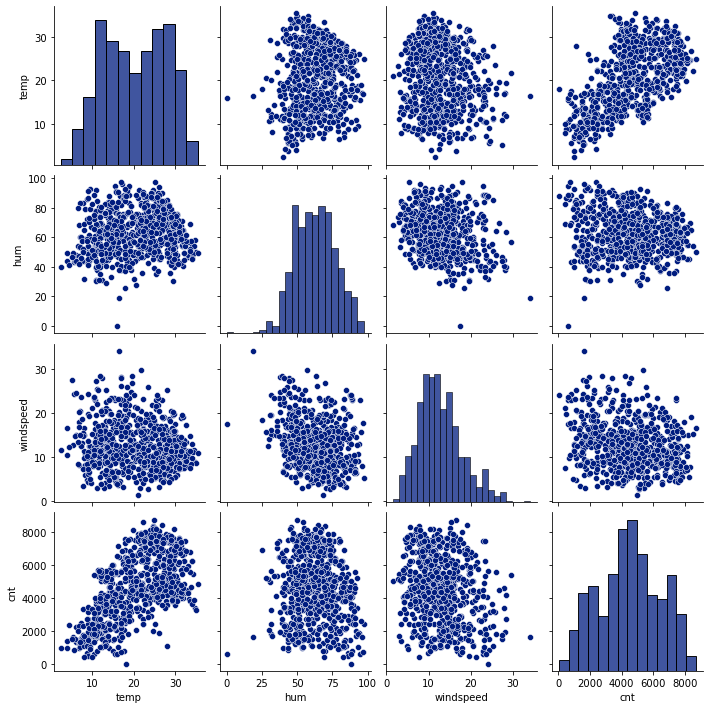

In [34]:
# Draw pair plot for the numerical cols
sns.pairplot(df[num_vars])
plt.show()

# Data for Modelling

### Encoding

 Dummy Variables

In [35]:
# Get the dummy variables for the feature 'months' and store it in a new variable - 'month_new'

month_new = pd.get_dummies(df['mnth'],drop_first=True)

# Check what the dataset 'month_new' looks like
month_new.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [36]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'weekday_new'

weekday_new = pd.get_dummies(df['weekday'],drop_first=True)

# Check what the dataset 'weekday_new' looks like
weekday_new.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [37]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_new'

season_new = pd.get_dummies(df['season'],drop_first=True)

# Check what the dataset 'season_new' looks like
season_new.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [38]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_new'

weathersit_new = pd.get_dummies(df['weathersit'],drop_first=True)

# Check what the dataset 'weathersit_new' looks like
weathersit_new.head()

,light_snowrain,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [39]:
# Add the results to the original df dataframe
df_new = pd.concat([df, month_new, weekday_new, weathersit_new,season_new], axis = 1)

In [40]:
# Now let's see the head of our dataframe.
df_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,spring,0,jan,0,mon,1,misty,14.110847,80.5833,10.749882,...,0,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,tue,1,misty,14.902598,69.6087,16.652113,...,0,0,0,1,0,0,1,1,0,0
2,spring,0,jan,0,wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,1,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,8.200000,59.0435,10.739832,...,0,0,1,0,0,0,0,1,0,0
4,spring,0,jan,0,fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [41]:
df_new.shape

(730, 33)

In [42]:
# Drop 'season', 'mnth', 'weekday',  'weathersit as we have created the dummies for it
df_new.drop(['season', 'mnth', 'weekday', 'weathersit'], axis = 1, inplace = True)

df_new.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
0,0,0,1,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,1,1,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [43]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   hum             730 non-null    float64
 5   windspeed       730 non-null    float64
 6   cnt             730 non-null    int64  
 7   aug             730 non-null    uint8  
 8   dec             730 non-null    uint8  
 9   feb             730 non-null    uint8  
 10  jan             730 non-null    uint8  
 11  july            730 non-null    uint8  
 12  june            730 non-null    uint8  
 13  mar             730 non-null    uint8  
 14  may             730 non-null    uint8  
 15  nov             730 non-null    uint8  
 16  oct             730 non-null    uint8  
 17  sep             730 non-null    uin

###  Splitting the Data into Training and Testing Sets

In [44]:
import sklearn
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(df_new, train_size = 0.7, random_state = 100)


In [45]:
#check shape for train
df_train.shape

(510, 29)

In [46]:
##check shape for test
df_test.shape

(220, 29)

### Rescaling the Features
We will use MinMax scaling.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
# Apply scaler() to all the columns except the  'number' variables
num_vars=['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,1,0,0,0,0,1,1,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,0,1,0,0,0,0,1,0,1,0
111,0,0,0,0.345824,0.751824,0.380981,0.191095,0,0,0,...,0,1,0,0,0,0,1,0,1,0


In [49]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.650480,0.320883,0.513499,0.096078,0.084314,0.066667,...,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098,0.243137,0.247059,0.247059
std,0.500429,0.157763,0.453386,0.225858,0.145846,0.169803,0.224421,0.294988,0.278131,0.249689,...,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867,0.429398,0.431725,0.431725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking correlation coefficients

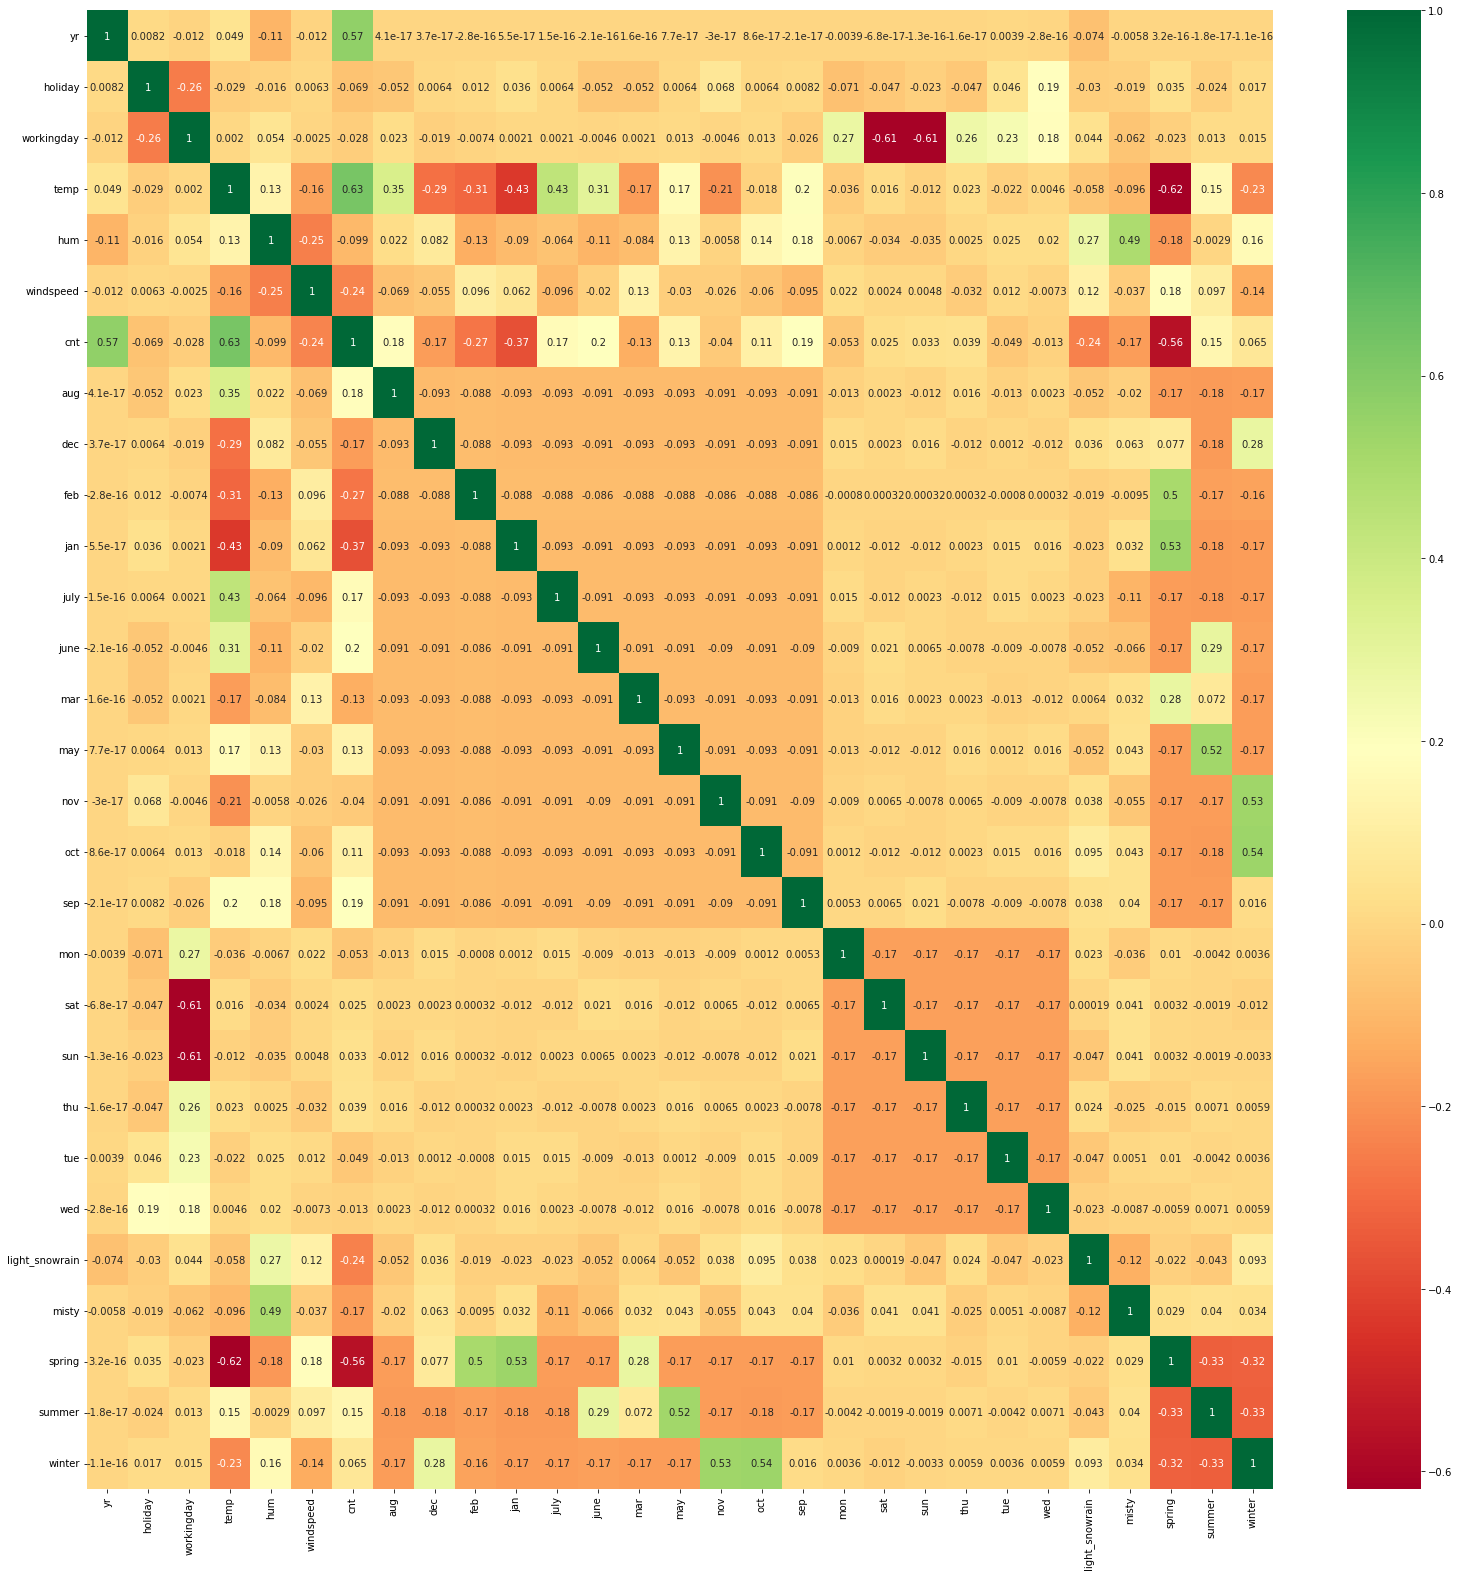

In [50]:
plt.figure(figsize=(22, 22))
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn')
plt.tight_layout()
plt.show()

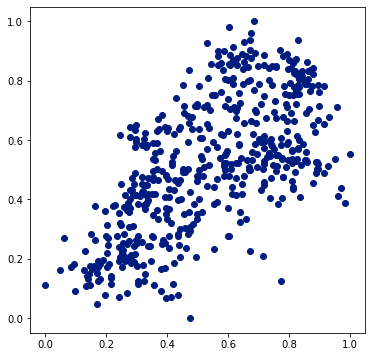

In [51]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

Above correlation between temp and cnt is positive.

# Building our model

This time, we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

### Dividing into X and Y sets for the model building

In [52]:
#Dividing into X and Y sets for the model building
y_train = df_train.pop('cnt')
X_train = df_train

## RFE
Recursive feature elimination

In [53]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [54]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [55]:
#list out the X_train.columns
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 9),
 ('dec', True, 1),
 ('feb', False, 2),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 11),
 ('mar', False, 14),
 ('may', False, 8),
 ('nov', True, 1),
 ('oct', False, 12),
 ('sep', True, 1),
 ('mon', False, 7),
 ('sat', False, 4),
 ('sun', False, 5),
 ('thu', False, 13),
 ('tue', False, 6),
 ('wed', False, 10),
 ('light_snowrain', True, 1),
 ('misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [56]:
# store in col X_train.columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'dec', 'jan', 'july',
       'nov', 'sep', 'light_snowrain', 'misty', 'spring', 'summer', 'winter'],
      dtype='object')

In [57]:
X_train.columns[~rfe.support_]

Index(['workingday', 'aug', 'feb', 'june', 'mar', 'may', 'oct', 'mon', 'sat',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

# Building model using statsmodel, for the detailed statistics

In [58]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Modeling

In [59]:
# importing packegaes
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

### Model:1

In [60]:

# Generic or hybrid  function to calculate VIF of variables

def VifCalc(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [61]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
3,hum,30.89
2,temp,17.79
4,windspeed,4.72
12,spring,4.37
14,winter,4.06
13,summer,2.82
11,misty,2.32
0,yr,2.09
8,nov,1.85
6,jan,1.75


humidity have high VIF value.

In [62]:
# add_constant and use OLS metheod
X_train_lm1 = sm.add_constant(X_train_rfe)
lr_model1 = sm.OLS(y_train,X_train_lm1).fit()
print(lr_model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          8.15e-189
Time:                        01:19:27   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

### Model:2

In [63]:
# We are dropping humidity variable as it has high p-value
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)

In [64]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
13,winter,2.95
11,spring,2.89
12,summer,2.24
0,yr,2.07
7,nov,1.81
5,jan,1.66
6,july,1.59
10,misty,1.57


In [65]:
# add_constant and use OLS metheod
X_train_lm2 = sm.add_constant(X_train_rfe)
lr_model2 = sm.OLS(y_train,X_train_lm2).fit()
print(lr_model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          4.75e-186
Time:                        01:19:27   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [66]:
#check for parameters 
lr_model2.params

const             0.245029
yr                0.234455
holiday          -0.091776
temp              0.438717
windspeed        -0.158482
dec              -0.042806
jan              -0.050008
july             -0.050046
nov              -0.039513
sep               0.068730
light_snowrain   -0.291749
misty            -0.080073
spring           -0.071257
summer            0.034890
winter            0.086883
dtype: float64

### Model:3

In [67]:
# We are dropping nov variable as it has high p-value
X_train_rfe = X_train_rfe.drop(["nov"], axis = 1)

In [68]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
2,temp,5.14
3,windspeed,4.62
10,spring,2.89
11,summer,2.24
0,yr,2.07
12,winter,2.05
5,jan,1.65
6,july,1.59
9,misty,1.57
7,sep,1.34


VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

In [69]:
# add_constant and use OLS metheod
X_train_lm3 = sm.add_constant(X_train_rfe)
lr_model3 = sm.OLS(y_train,X_train_lm3).fit()
print(lr_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.74e-186
Time:                        01:19:27   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2283      0.031      7.

### Model:4

In [70]:
# We are dropping dec variable as it has high p-value
X_train_rfe = X_train_rfe.drop(["dec"], axis = 1)

In [71]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
9,spring,2.75
10,summer,2.24
0,yr,2.07
11,winter,1.78
4,jan,1.61
5,july,1.59
8,misty,1.56
6,sep,1.34


In [72]:
# add_constant and use OLS metheod
X_train_lm4 = sm.add_constant(X_train_rfe)
lr_model4 = sm.OLS(y_train,X_train_lm4).fit()
print(lr_model4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          8.14e-187
Time:                        01:19:28   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

### Model:5

In [73]:
# We are dropping jan variable as it has high p-value
X_train_rfe = X_train_rfe.drop(["jan"], axis = 1)

In [74]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
9,summer,2.23
8,spring,2.08
0,yr,2.07
10,winter,1.78
4,july,1.58
7,misty,1.55
5,sep,1.34
6,light_snowrain,1.08


In [75]:
# add_constant and use OLS metheod
X_train_lm5 = sm.add_constant(X_train_rfe)
lr_model5 = sm.OLS(y_train,X_train_lm5).fit()
print(lr_model5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          5.06e-187
Time:                        01:19:28   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

VIF doesnt seems to be affected much after dropping few of the variables. Lets proceed more to observe better model.

### Model:6

In [76]:
# We are dropping july variable as it has high p-value
X_train_rfe = X_train_rfe.drop(["july"], axis = 1)

In [77]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
7,spring,1.99
8,summer,1.90
9,winter,1.63
6,misty,1.55
4,sep,1.23
5,light_snowrain,1.08
1,holiday,1.04


In [78]:
X_train_lm6 = sm.add_constant(X_train_rfe)
lr_model6 = sm.OLS(y_train,X_train_lm6).fit()
print(lr_model6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          1.47e-186
Time:                        01:19:28   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

VIF doesnt seems to be affected much after dropping few of the variables.

### Model:7

In [79]:
# We are dropping spring variable as it has high p-value
X_train_rfe = X_train_rfe.drop(["spring"], axis = 1)

In [80]:
# calculate VIF

VifCalc(X_train_rfe)

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
7,summer,1.57
6,misty,1.48
8,winter,1.37
4,sep,1.20
5,light_snowrain,1.08
1,holiday,1.04


In [81]:
# add_constant and use OLS metheod
X_train_lm7 = sm.add_constant(X_train_rfe)
lr_model7 = sm.OLS(y_train,X_train_lm7).fit()
print(lr_model7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 08 Nov 2022   Prob (F-statistic):          2.83e-186
Time:                        01:19:28   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1259      0.017      7.

In [82]:
round(lr_model7.params,2)

const             0.13
yr                0.23
holiday          -0.10
temp              0.55
windspeed        -0.15
sep               0.10
light_snowrain   -0.28
misty            -0.08
summer            0.09
winter            0.13
dtype: float64

### final model values:
* VIF is 3.68
* we have got final variable 9
* P values 0.00
* top 3 variable from lr_model7 model is temp,light_snowrain and yr
* From the lr_model7  summary, it is evident that all our coefficients are not equal to zerowhich means We REJECT the NULL HYPOTHESIS

* VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.
* F-Statistics value of 271.9 (which is greater than 1) and the p-value of 1.47e-186 i.e almost equals to zero, states that the overall model is significant
    

### F Statistics
* F-statistic: 271.9
* Prob (F-statistic): 2.83e-186

### Linearity check

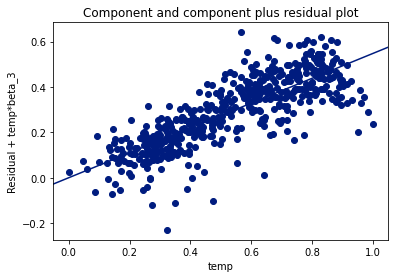

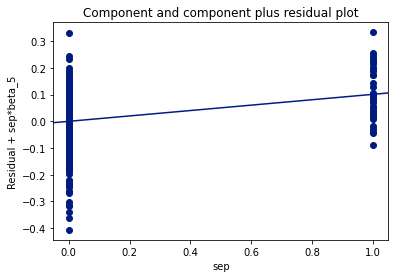

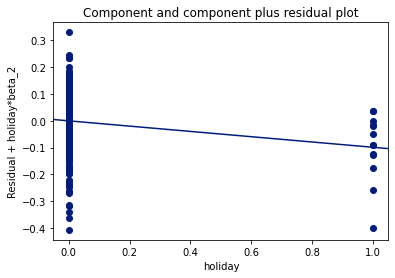

In [83]:
# Linear relationship validation using CCPR plot
# Component and component plus residual plot
sm.graphics.plot_ccpr(lr_model7, 'temp')
plt.show()

sm.graphics.plot_ccpr(lr_model7, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_model7, 'holiday')
plt.show()

You have obeserved Linearity  from above visualizations temp have high relation.

### Homoscedasticity check

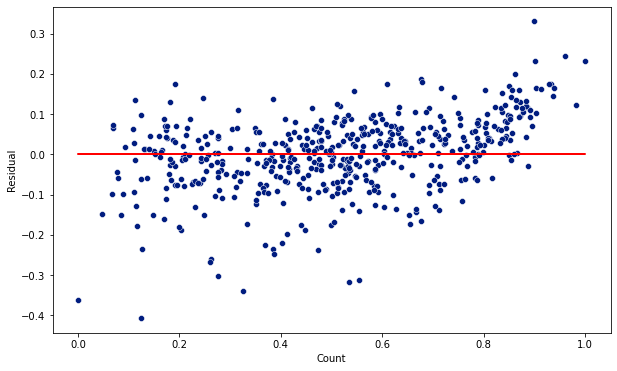

In [84]:
plt.figure(figsize=(10, 6))
y_train_pred = lr_model7.predict(X_train_lm7)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No visible pattern observed from above plot for residuals.

#### check for  Independence of residuals
Durbin-Watson value of final model lr_model7 is 2.097, which signifies there is no autocorrelation.

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [85]:
#check RSS actual-predict 
y_train_pred=lr_model7.predict(X_train_lm7)
res=y_train-y_train_pred

### Normality of error terms

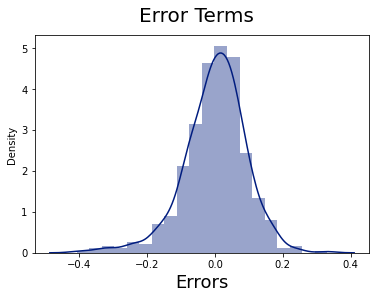

In [86]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20) 
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                        # X-label
plt.show()

Insights:

-From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Checking for Multi Colinearity

Error terms shows normal distribution

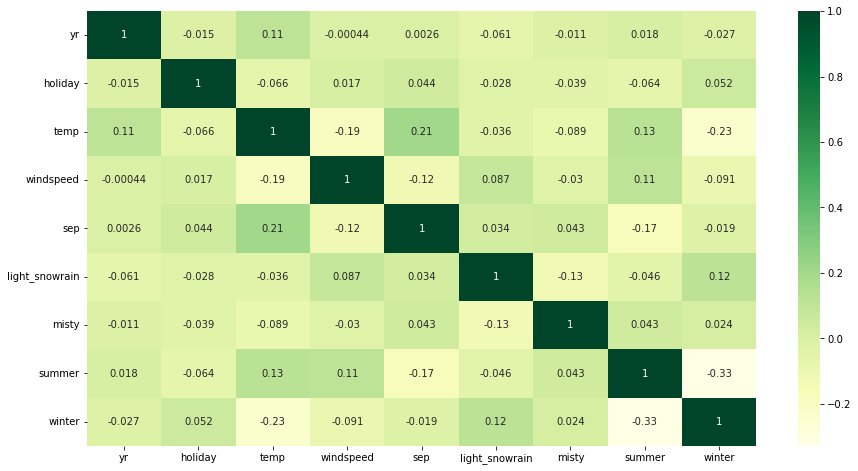

In [87]:
#draw Multi Colinearity using heatmap
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="YlGn")
plt.show()

- There is no multicolinearity as seen from the heatmap.
- VIF is less than 5 good to have and below  2 better.
- temp and sep having high corelation 

# Making Predictions

Applying the scaling on the test sets

In [88]:
#Applying the scaling on the test sets
num_vars = num_vars=['temp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [89]:
df_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,1,0,1,0,0,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,0,0,...,0,0,1,0,0,0,0,0,1,0
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,0,...,1,0,0,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [90]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,aug,dec,feb,...,sat,sun,thu,tue,wed,light_snowrain,misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.638221,0.313293,0.522154,0.059091,0.086364,0.100000,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.480828,0.233187,0.148694,0.159584,0.219163,0.236333,0.281541,0.300684,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X_test and y_test

In [91]:
#pop cnt divide x& y
y_test = df_test.pop('cnt')
X_test = df_test

In [92]:
#check info
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              220 non-null    int64  
 1   holiday         220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   temp            220 non-null    float64
 4   hum             220 non-null    float64
 5   windspeed       220 non-null    float64
 6   aug             220 non-null    uint8  
 7   dec             220 non-null    uint8  
 8   feb             220 non-null    uint8  
 9   jan             220 non-null    uint8  
 10  july            220 non-null    uint8  
 11  june            220 non-null    uint8  
 12  mar             220 non-null    uint8  
 13  may             220 non-null    uint8  
 14  nov             220 non-null    uint8  
 15  oct             220 non-null    uint8  
 16  sep             220 non-null    uint8  
 17  mon             220 non-null    u

In [93]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   holiday         220 non-null    int64  
 3   temp            220 non-null    float64
 4   windspeed       220 non-null    float64
 5   sep             220 non-null    uint8  
 6   light_snowrain  220 non-null    uint8  
 7   misty           220 non-null    uint8  
 8   summer          220 non-null    uint8  
 9   winter          220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(5)
memory usage: 11.4 KB


In [94]:
# Making predictions
y_test_pred = lr_model7.predict(X_test_new)

# Model Evaluation

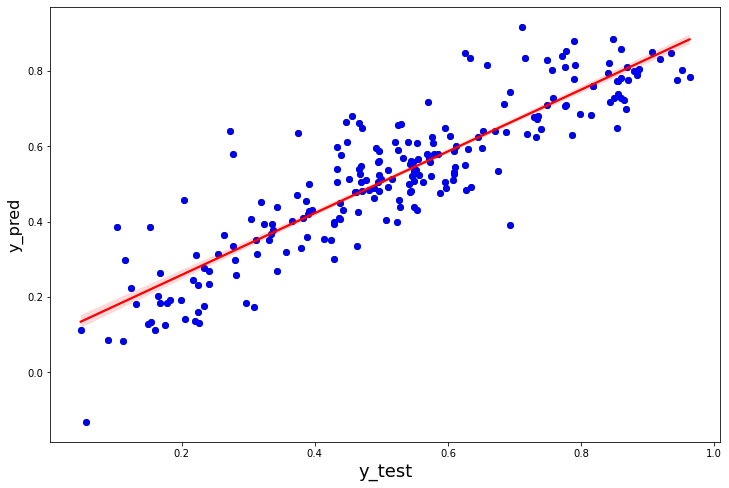

In [95]:
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=(12, 8))
plt.scatter(y_test,y_test_pred)

sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.show()

round(lr_model7.params,4)

In [96]:
print(lm.intercept_)
print(lm.coef_)

0.39116310428869494
[ 0.23113454 -0.13475388 -0.06004869  0.44051172 -0.15735461 -0.18248588
  0.02730744 -0.04438711 -0.03742192 -0.06420883 -0.02850373  0.00839253
  0.00079984  0.02473206 -0.03955335  0.00563407  0.09082283 -0.0246206
 -0.05571884 -0.04945969  0.00422678 -0.02607218 -0.01022525 -0.24994689
 -0.0578478  -0.04038561  0.04644297  0.11262053]


#### We can see that the equation of our best fitted line is:

cnt = 0.1259+(0.2329 * yr) - (0.0987 * holiday) + (0.5480 * temp) -(0.1532 * windspeed)+ (0.1012 * sep)-(0.2850 * light_snowrain) - (0.0787 * misty)+ (0.0881 * summer)+ (0.1293 * winter)

### R2 Score

In [97]:
# Importing the required libraries
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
# calculate r2 for train
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print(round(r2_train,3))

0.83


In [99]:
# calculate r2 for test
r2_test = (r2_score(y_true=y_test,y_pred=y_test_pred))
print(round(r2_test,3))

0.794


### Adjusted R2 Score

In [100]:
# calculate Adjusted r2 for train
adj_r2_score_train=round(1-(1-r2_train)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),3)
print(adj_r2_score_train)

0.82


In [101]:
# calculate Adjusted r2 for test
adj_r2_score_test=round(1-(1-r2_test)*(X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1),3)
print(adj_r2_score_test)

0.782


# Comparision between Training and Testing dataset:

- Train dataset R^2          : 0.839
- Test dataset R^2           : 0.794
- Train dataset Adjusted R^2 : 0.82    
- Test dataset Adjusted R^2  : 0.782

- This Looks we have got Good model
-  Bikes Demands depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, summer and winter.

### Final Conclusion

As per our final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp) - A coefficient value of ‘0.54800’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.54800 units.
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds - A coefficient value of ‘-0.28286’ indicated that, w.r.t Clear, Few clouds, Partly cloudy, Partly cloudy, a unit increase in Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds variable decreases the bike hire numbers by -0.28286 units.

- Year (yr) - A coefficient value of ‘0.232861’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.232861 units.

-As per our final Model, Best seasons to suggest you to get maximum bike bookings are:

    -summer:-A coefficient value of summer 0.0881
    -winter:-A coefficient value of winter 0.1293


-As per our final Model, Best weather to suggest you to get maximum bike bookings are:
        
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
       
-windspeed:- A coefficient value of 0.1532
- sep: sept month is the best to get more booking as its coefficient value of  0.10